In [1]:
import numpy as np
from pandas import DataFrame
from numpy import array, dot, sum, transpose

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
x = np.array(list(map(float, open('ex2x.dat').read().split())))
y = np.array(list(map(float, open('ex2y.dat').read().split())))

In [3]:
x.shape, y.shape

((50,), (50,))

In [4]:
x.shape, y.shape

((50,), (50,))

In [5]:
DataFrame(x).head()

,0
0,2.065875
1,2.368409
2,2.539993
3,2.542080
4,2.549079


In [6]:
DataFrame(y).head()

,0
0,0.779189
1,0.915968
2,0.905384
3,0.905661
4,0.938989


In [7]:
theta = np.zeros((2, 1))

DataFrame(theta)

,0
0,0.0
1,0.0


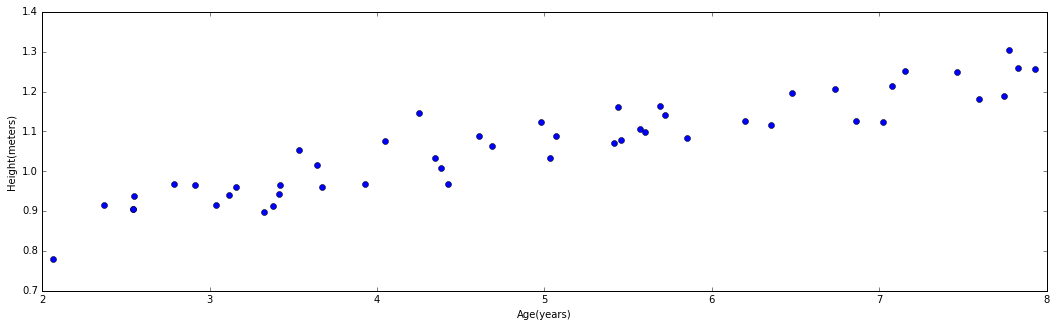

In [8]:
plt.figure(figsize=(18, 5))
plt.plot(x, y, 'o')
plt.xlabel('Age(years)')
plt.ylabel('Height(meters)')

## Theory

Lets assume that our data fits into a 2 degree polynomial. Implies like `y = mx + c`, which mean we need to find two variables `m` and `c` as we alreadh have values of `x` and `y`.

    theta = [[m], [c]] or(say) [[theta1], [theta2]]

Error function:

    J(theta) = (1/2M) * Sigma{(i -> 1 to M)power([y_pred_i - y_i], 2)}

#### Gradient Decend of this J(theta):

Partial derivative of this function `J` with respect `theta1` or `m` is

    d(J)/d(theta1) = (1/2M) * Sigma{(i -> 1 to M) * 2 * [y_pred_i - y_i] * x_i }
    d(J)/d(theta2) = (1/2M) * Sigma{(i -> 1 to M) * 2 * [y_pred_i - y_i] * 1 }
    

For point `i`, the equation & derivates looks like below

    y_pred_i = y_pred value at point i = m * x_i + c = theta1 * x_i + theta2

        d(y_pred_i)/d(theta1) = x_i
        d(y_pred_i)/d(theta1) = 1
    
__Gradient Shifts/Improvemetns:___

    theta1 = theta1 - d(J)/d(theta1) * alpha
    theta2 = theta2 - d(J)/d(theta2) * alpha

Note2: 
* x_i, y_i are the given values & so are constants.
* alpha - learning rate

## Adjustments

For the sake of vectorisation(converting point to matrices) we need little adjustments.

[
    y1
    y2
    y3
    ..
] = [
        (m * x1 + c)
        (m * x2 + c),
        (m * x3 + c),
        ......
    ]
    
 = dot([
     [x1 1]
     [x2 1]
     [x3 1]
 ], [
     [m]
     [c]
]
)

Y = dot(X, theta)

* Y is of shape [no_of_point, 1]
* X is of shape [no_of_point, 2]
* theta is of shape [2, 1]

## Adjusted(vectorised) Gradient Decent


    d(J)/d(theta1) = (1/2M) * Sigma{(i -> 1 to M) * 2 * [y_pred_i - y_i] * x_i }
    
                = (1/M){
                    [y_pred_0 - y_0] * x_0 + [y_pred_1 - y_i] * x_1 + ........+ [y_pred_i - y_i] * x_i
                    }
                = (1/M) * 
                    dot(
                        [[y_pred_0 - y_0], [y_pred_1 - y_1], [y_pred_2 - y_2] ....], # dot product first matrix
                        [ [x_0],  # dot product second matric
                          [x_1],
                          [x_2],
                           ....
                          [x_0]]
                          )
                          
                = (1/M) * dot((Y_predicted - Y), X1) # new variable introducted as X1


    d(J)/d(theta2) = (1/2M) * Sigma{(i -> 1 to M) * 2 * [y_pred_i - y_i] * 1 }
    
                = (1/M){
                    [y_pred_0 - y_0] * 1 + [y_pred_1 - y_i] * 1 + ........+ [y_pred_i - y_i] * 1
                    }
                = (1/M) * 
                    dot(
                        [[y_pred_0 - y_0], [y_pred_1 - y_1], [y_pred_2 - y_2] ....], # dot product first matrix
                        [ [1],  # dot product second matric
                          [1],
                          [1],
                           ....
                          [1]]
                          )
                = (1/M) * dot((Y_predicted - Y), X2) # new variable introduced as X2
                
                
X1 = [[x0], [x2], [x3], ...]
X2 = [[1], [1], [1], ...]

As we know X = [ [x0 1] # from above adjustment
                 [x1 1]
                 [x2 1]
                 .....
                 ]

Implies
        

    theta = theta - d(J)/d(theta) * alpha
          = [[theta1], [theta2]] - [[d(J)/d(theta1)], [d(J)/d(theta1)]] # expanded theta to see that matching size
          ...
          ... (here I had some doubts about shape I did lots of experiments :D )
          ...
          = theta - (1/M) * (dot((Y_predicted - Y).T, X).T
          
Note:
* `.T` is the Transpose of that Matrix

## Application of Principles

In [77]:
#  re-loading data to make sure we did nt do any changes before

x = np.array(list(map(float, open('ex2x.dat').read().split())))
y = np.array(list(map(float, open('ex2y.dat').read().split())))

x.shape, y.shape

((50,), (50,))

In [78]:
M = 50 # 50 points na - same as len(x)

x = np.array([(_, 1) for _ in x])

y.shape = (50, 1)

theta = np.ones((2, 1))

y.shape, x.shape, theta.shape

((50, 1), (50, 2), (2, 1))

In [79]:
scores = []
learning_rate = 0.01

for i in range(251):
    Y_predicted = np.dot(x, theta)
    pred_errs = (Y_predicted - y).T
    theta = theta - ((1/M) * dot(pred_errs, x).T) * learning_rate
    score = np.mean(np.sqrt(pred_errs ** 2))
    scores.append(score)
    if i % 25 == 0:
        print('Iter:', i, '\t Error:', score, theta)
        

Iter: 0 	 Error: 4.8588859174 [[ 0.73339214]
 [ 0.95141114]]
Iter: 25 	 Error: 0.0419875774014 [[ 0.05043265]
 [ 0.82511109]]
Iter: 50 	 Error: 0.0416897984622 [[ 0.05060198]
 [ 0.82315043]]
Iter: 75 	 Error: 0.0414522744264 [[ 0.05094362]
 [ 0.82127237]]
Iter: 100 	 Error: 0.0412208761013 [[ 0.05127651]
 [ 0.81944264]]
Iter: 125 	 Error: 0.0409954319091 [[ 0.05160084]
 [ 0.81765998]]
Iter: 150 	 Error: 0.0407757886396 [[ 0.05191683]
 [ 0.8159232 ]]
Iter: 175 	 Error: 0.0405617970289 [[ 0.05222469]
 [ 0.81423111]]
Iter: 200 	 Error: 0.0403533116537 [[ 0.05252462]
 [ 0.81258255]]
Iter: 225 	 Error: 0.0401501908325 [[ 0.05281684]
 [ 0.81097642]]
Iter: 250 	 Error: 0.0399648066812 [[ 0.05310153]
 [ 0.80941161]]


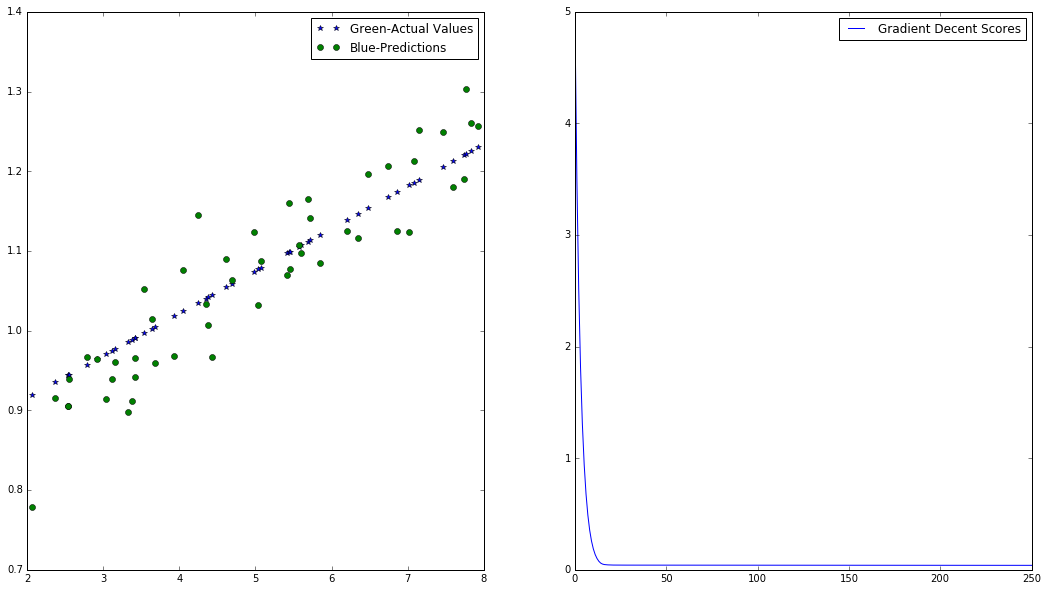

In [80]:
plt.figure(figsize=(18, 10))

ax1, ax2 = plt.subplot(1, 2, 1), plt.subplot(1, 2, 2)

ax1.plot(x[:, 0], Y_predicted.ravel(), '*', )
ax1.plot(x[:, 0], y, 'o', )
ax1.legend(['Green-Actual Values', 'Blue-Predictions'])

ax2.plot(range(len(scores)), scores)
ax2.legend(['Gradient Decent Scores'])